# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1. $m(a+bX)=\frac{1}{N}∑(a+bx)_i=\frac{1}{N}a+b∑x_i=a+b(\frac{1}{N}∑x_i)=a+b×(X)$

---

2. $\text{cov}(X,a+bY)=\dfrac{1}{N}\sum_{i=1}^N(x_i-m(X))((a+by)_i-m(a+bY)
=\dfrac{1}{N}\sum_{i=1}^N(x_i-m(X))(a+by_i-a-b×m(Y))
=\dfrac{1}{N}\sum_{i=1}^N(x_i-m(X))(by_i-b×m(Y))
=\dfrac{1}{N}\sum_{i=1}^N(x_i-m(X))b×(y_im(Y))
=\dfrac{1}{N}b×\sum_{i=1}^N(x_i-m(X))(y_im(Y))
=b×(\dfrac{1}{N}\sum_{i=1}^N(x_i-m(X))(y_im(Y)))
=b×\text{cov}(X,Y)$

---

3. $\text{cov}(a+bX,a+bX)=\dfrac{1}{N}\sum_{i=1}^N((a+bx)_i-m(a+bX))((a+bx)_i-m(a+bX)
=\dfrac{1}{N}\sum_{i=1}^N(a+bx_i-a-bm(X))(a+bx_i-a-b×m(X))
=\dfrac{1}{N}\sum_{i=1}^N(bx_i-b×m(X))(bx_i-b×m(X))
=\dfrac{1}{N}\sum_{i=1}^Nb×(x_i-m(X))b×(x_im(X))
=\dfrac{1}{N}b^2×\sum_{i=1}^N(x_i-m(X))(x_im(X))
=b^2×(\dfrac{1}{N}\sum_{i=1}^N(x_i-m(X))(x_im(X)))
=b^2×\text{cov}(X,X)$

Also, $\text{cov}(X,X)=\dfrac{1}{N}\sum_{i=1}^N(x_i-m(X))(x_i-m(X)= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2=s^2$

---

4. Let X̃ be the median of the original random variable X, then the median of the random variable g(X) that have transformed non-decreasingly from X would be g(X̃) as we shift the whole dataset through the non-decreasing transformation g(.). As a result, the median also had an non-decreasing transformation.

For the quantile, same thing happens. Suppose $Q_{1,x}, Q_{2,x}, Q_{3,x}, Q_{4,x}$ are the respective quartiles for random variable X. Then the transformed Q1 would be $g(Q_{1,x})$ and so on for Q2, Q3, and Q4,  because we are shifting the whole dataset through the non-decreasing g(.), the quantiles would be non-decreasing.

Then, for IQR, the original IQR = $Q_{3,x}- Q_{1,x}$ and the transformed IQR = $g(Q_{3,x}) - g(Q_{1,x})$. In this case, since the transformation is non-decreasing, and we know that $Q_{3,x} > Q_{1,x}$, so $g(Q_{3,x}) > g(Q_{1,x})$. However, since we don't know how the transformation perform across the domain (like if it is linear), we cannot tell if the transformed IQR would be bigger or smaller or the same as the original IQR, so we cannot tell if the IQR would be non-decreasing.

Same for the range, though we are sure that the original range = max(X) - min(X), and the transformed range = g(max(X)) - g(min(X)), we don't know how the transformation perform, and thus cannot tell if the range would be non-decreasing or not.

---

5. $m(g(X))=\frac{1}{N}∑g(x)_i$. In this case, since we don't know how the transformation perform across the domain (like if it is linear), we cannot tell if the transformed mean would be bigger or smaller or the same as the original mean, so we cannot tell if the mean would be non-decreasing.

---

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
airbnb = pd.read_csv("https://raw.githubusercontent.com/xec9cp/eda_assignment/refs/heads/main/data/airbnb_hw.csv")

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [153]:
print(airbnb.shape) #there are 30478 observations, with 13 columns/variables
print(airbnb.columns) #this shows the variables included
airbnb.head()

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [154]:
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


- Apartment is the most popular property Type, and among the apartments, entire home/apt is the most popular room type. Generally, not a lot of shared room rentals.
- Bed & Breakfast, House, Hut, Treehouse, and Other Property Type has more Private room rentals than the whole property.

----

4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

In [155]:
print(type(airbnb['Price'][1])) #find that the data are still in string type
airbnb['Price'] = airbnb['Price'].str.replace(',', '').astype('float')

<class 'str'>


<Axes: >

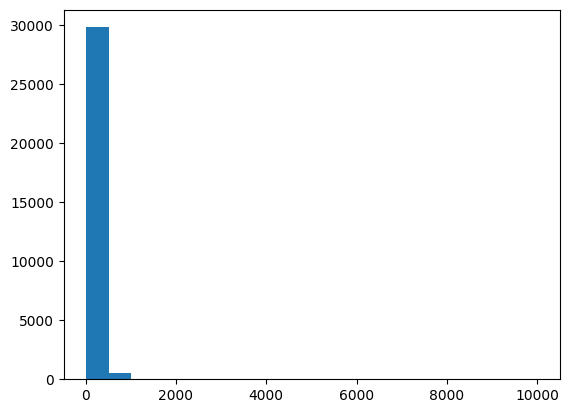

In [156]:
airbnb['Price'].hist(bins=20,grid=False) #this shows that the data is badly scaled because it has a long tail

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


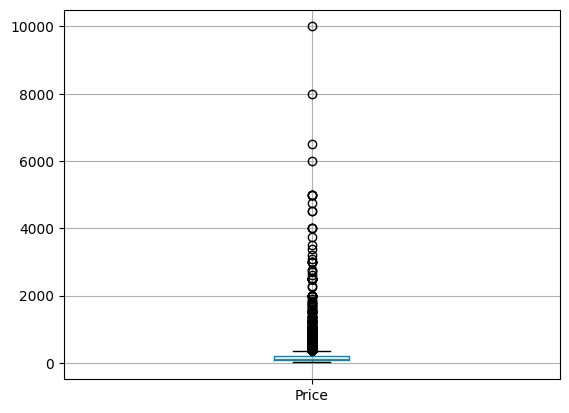

In [157]:
airbnb.boxplot(column = 'Price') #this shows that there are a lot of outliers for the upper end
airbnb['Price'].describe()

<Axes: >

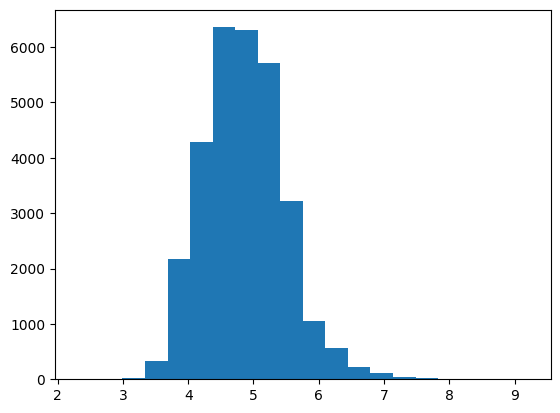

In [158]:
airbnb['price_log'] = np.log(airbnb['Price'])
airbnb.loc[airbnb['price_log']>0,'price_log'].hist(bins=20,grid=False) #the shape of the graph is better (with the bell-shape)

,price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


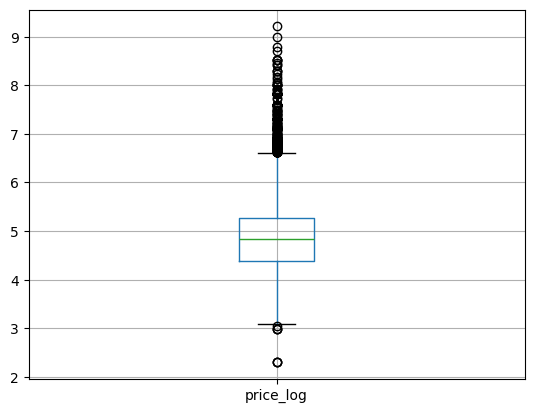

In [159]:
airbnb.boxplot(column = 'price_log') #still has a lot of outliers, but much better
airbnb['price_log'].describe()

 ---
 5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='Beds', ylabel='price_log'>

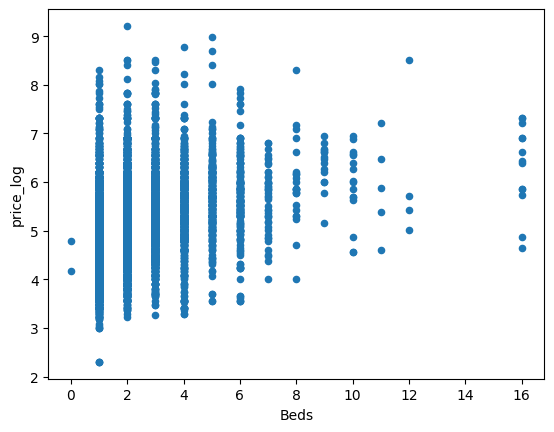

In [160]:
airbnb.plot.scatter(y='price_log',x='Beds')

- There are no 14 Beds rooms in the data.
- The graph shows that generally, the more beds, the higher possible minimum log price (like the lower bound of the price_log), while the maximum log price has a decreasing patter as the beds number increases.
- Also, we got 2 possible price_log for 0 Beds.

In [161]:
airbnb['price_log'].groupby(airbnb['Beds']).describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20344.0,4.686977,0.539666,2.302585,4.317488,4.605170,5.043425,8.294050
2.0,6610.0,5.094504,0.580425,3.218876,4.744932,5.075174,5.416100,9.210340
3.0,2071.0,5.340837,0.644742,3.258097,4.941642,5.298317,5.703782,8.517193
4.0,783.0,5.480463,0.721360,3.295837,5.010635,5.509388,5.926926,8.779557
5.0,284.0,5.669484,0.735623,3.555348,5.245705,5.669881,6.109248,8.987197
6.0,177.0,5.651790,0.824358,3.555348,5.293305,5.616771,6.052089,7.919356
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,24.0,5.956200,0.862418,4.007333,5.495121,5.857933,6.176138,8.294050


- Average price has a increasing trend as the Beds increases generally.
- Standard deviation in prices has a increase at first, then there are some votility when the Beds is between 6 and 10, and then it reaches a peak when Beds is 12, and then decreases for 16 beds.
---

6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

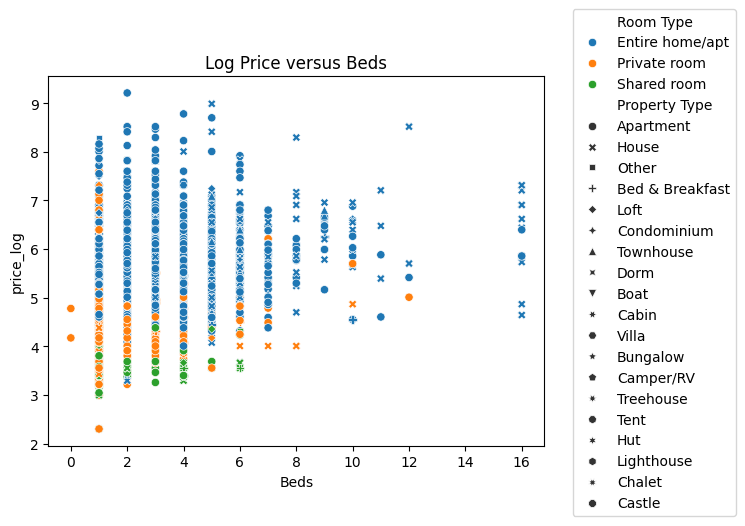

In [162]:
plot6 = sns.scatterplot(data=airbnb, x='Beds', y='price_log', hue='Room Type', style = 'Property Type')
plot6.set(title='Log Price versus Beds')
sns.move_legend(plot6, "upper right", bbox_to_anchor=(1.4, 1.2)) # Moves the Legend

- Entire home/apt tend to be more expensive, and shared room tend to be cheaper when the beds are the same.
- Shared room options are only happens when beds are 6 and below.
- When comes to 12 and above beds, apartment and house becomes the only property type.

In [163]:
airbnb.loc[:,['Price', 'Room Type', 'Property Type']].groupby(['Room Type', 'Property Type']).describe()

Price                                  \
                                   count        mean          std    min   
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                                                  
                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.0

- The Room Type of 'Entire house/apt' and Property Type 'Other' combination has the highest prices on average. This combination also has the highest standard deviation.
- Median might be a more reliable estimate of central tendency in this case, because we have a lot of outliers in the Price variable which would influnce the acurracy of the mean.
---

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [164]:
rigs = pd.read_csv('https://raw.githubusercontent.com/xec9cp/eda_assignment/refs/heads/main/data/drilling_rigs.csv')

In [165]:
print(rigs.shape)
print(rigs.columns)
print(rigs.dtypes)

rigs.head()

(623, 10)
Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)              

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


- There are 623 observations, with 10 columns/variables
- Long variable names, which are the variables other than 'Month' should be renamed
- We might want to change 'Month' to int64 or datetime type. Column 4 to 8 and column 10 need to change to int64 type.
---

2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.

In [166]:
rigs['time'] = pd.to_datetime(rigs['Month'], format='mixed')

In [167]:
rigs=rigs.rename(columns = {'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)':'onshore_rotary',
                    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)':'offshore_rotary',
                    'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)':'total_crude_oil',
                    'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)': 'total_natual_gas',
                    'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)':'horizontal_trajectory',
                    'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)':'directional_trajectory',
                    'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)': 'vertical_trajectory',
                    'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)': 'total_crude_natural',
                    'Active Well Service Rig Count (Number of Rigs)':'active_well'}) # Rename variables

In [168]:
rigs['active_well'] = pd.to_numeric(rigs['active_well'], errors = 'coerce') # column replacement for the missing values
rigs['active_well_na'] = rigs['active_well'].isnull() #dummy for missing

rigs.head()

,Month,onshore_rotary,offshore_rotary,total_crude_oil,total_natual_gas,horizontal_trajectory,directional_trajectory,vertical_trajectory,total_crude_natural,active_well,time,active_well_na
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549.0,1973-01-01,False
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677.0,1973-02-01,False
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805.0,1973-03-01,False
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898.0,1973-04-01,False
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991.0,1973-05-01,False


3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

[Text(0.5, 1.0, 'Total Number of Rigs Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Active Well Service Rig Count (Number of Rigs)')]

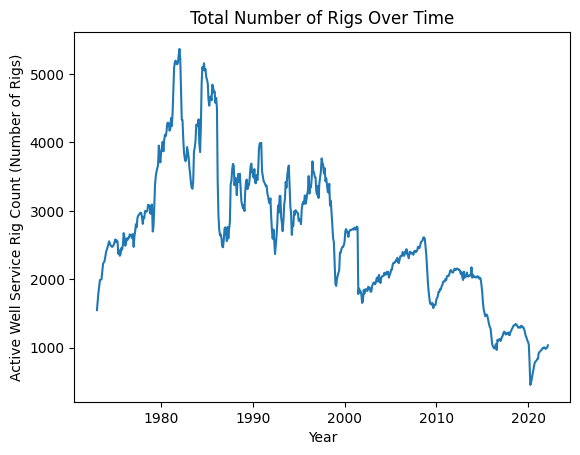

In [169]:
plot3 = sns.lineplot(data = rigs, x = 'time',
                   y = 'active_well')
plot3.set(title="Total Number of Rigs Over Time",
        xlabel='Year', ylabel='Active Well Service Rig Count (Number of Rigs)')

4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.

In [170]:
rigs = rigs.sort_values("time").dropna(subset=["active_well"])
y = rigs["active_well"].to_numpy()
t = len(y)

# First difference
diff = y[1:] - y[:(t-1)]

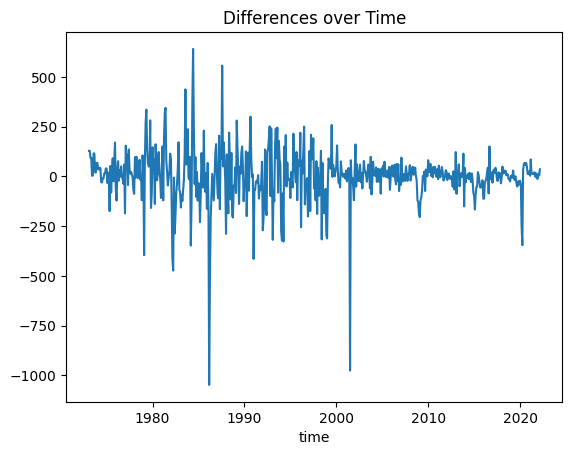

In [171]:
fig = sns.lineplot(x=rigs['time'][1:],y=diff)
fig.set(title='Differences over Time')
plt.show()

- There is a greater votility around 1985, especially there is a huge drop around 1987; then there is a quite big drop around 2003.
- After around 2010, there is a relatively flat regions near zero, which indicates stable rig counts afterwards.
---

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

[Text(0.5, 1.0, 'Number of Onshore and Offshore Rigs'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Counts')]

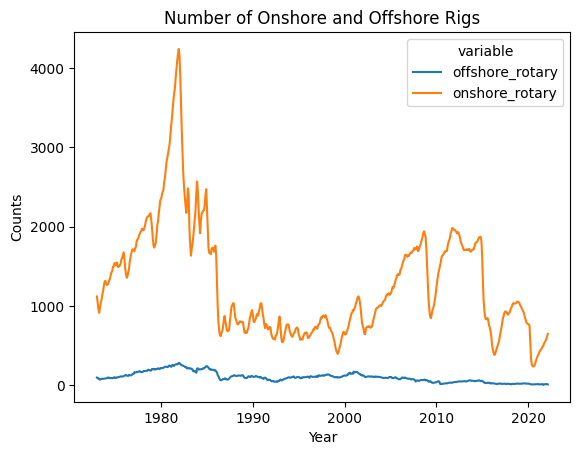

In [172]:
on_off = rigs.filter(['offshore_rotary', 'onshore_rotary', 'time']).melt(id_vars='time') # Melt the data
fig5 = sns.lineplot(data=on_off,x='time',y='value',hue='variable')
fig5.set(title='Number of Onshore and Offshore Rigs',xlabel='Year',ylabel='Counts')